# System of Equation in Scipy and Sympy

In [110]:
# convention
import numpy as np
import scipy as sp
import scipy.linalg as la 
# The top-level components of scipy (such as linalg, optimize, etc.) are so-called subpackages and not modules (i.e., they're directories, not source code). 
# Scipy is set up such that subpackages must be imported separately.sp.linalg won't work
import sympy as sym
sym.init_printing() # for printing latex/mathjax format output

In [111]:
# plotting
import matplotlib as mpl
# matplotlib for ploting
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D     # 3d
# for inline interactive plotting
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

## Review Ass1
### Question 1 (d)
Plot two panels.

<IPython.core.display.Javascript object>


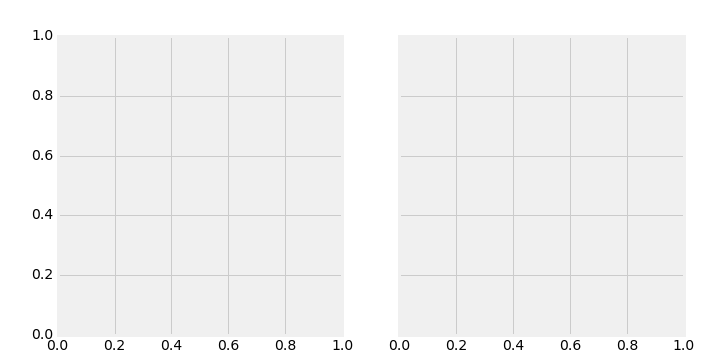

In [112]:
fig, (ax1, ax2)  = plt.subplots(1,2, sharey= True,figsize = (10,5)) # you can set the for fig
#ax1.plot
#ax2.plot

<IPython.core.display.Javascript object>


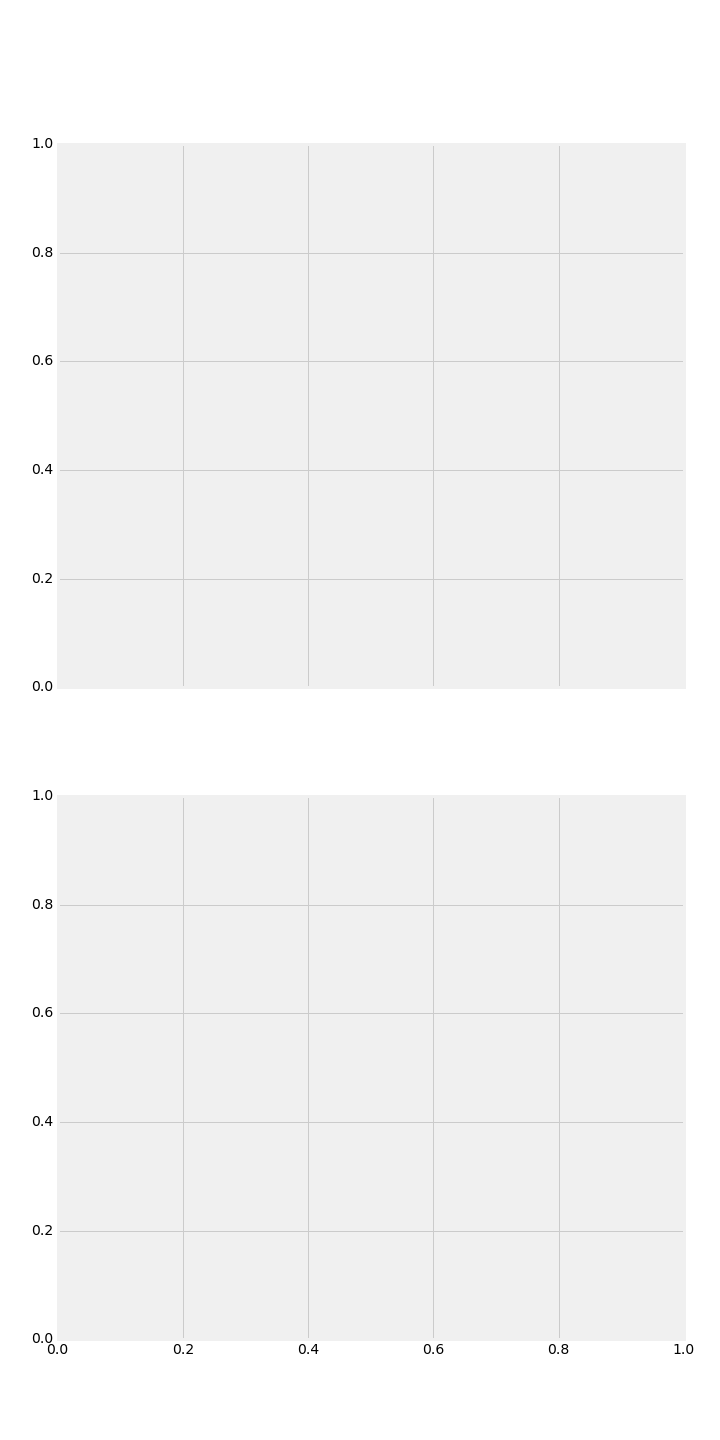

In [113]:
fig, ax  = plt.subplots(2,1, sharex= True,figsize = (10,20)) # you can set the for fig
#ax[0].plot
#ax[1].plot

### Question 2 
#### (a)

Plot the two **indirect functions** (note:  the **price has to be on the y-axis**).

In [114]:
def demand(p, a, e):
    return a*p**e
def indirectDemand(q,a,e):
    return (q/a)**(1/e)    

<IPython.core.display.Javascript object>


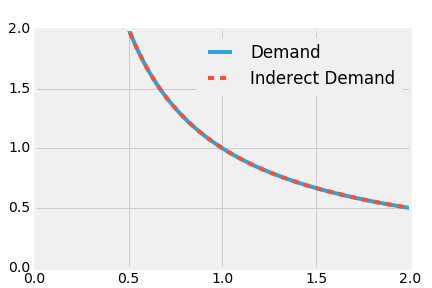

In [115]:
x_grid = np.linspace(0.1,2,201)
figure = plt.figure()
plt.plot(x_grid,demand(x_grid,1,-1),label = "Demand")
plt.plot(x_grid,indirectDemand(x_grid,1,-1), linestyle = "--",label = "Inderect Demand")
plt.ylim(0,2)
plt.legend();

<IPython.core.display.Javascript object>


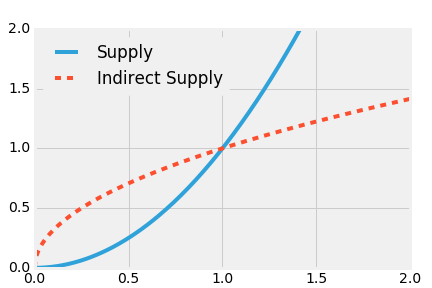

In [116]:
def supply(p, eta):
    return p**eta
def indirectSupply(q,eta):
    return (q)**(1/eta)
x_grid = np.linspace(0,2,201)
figure = plt.figure()
plt.plot(x_grid,supply(x_grid,2),label = "Supply")
plt.plot(x_grid,indirectSupply(x_grid,2), linestyle = "--",label = "Indirect Supply")
plt.ylim(0,2)
plt.legend(loc=0);

####  (b)

Write a **do-loop** where at each iteration the equilibrium price and quantity are computed and displayed (for all four combinations).  Report these four set of values in a **table** and **comment**.

In [117]:
a =  2; e = -2; eta=1
def fun(p):
    return p**eta - a*p**e
def fprime(p):
    return eta*p**(eta-1)-a*e*p**(e-1)

#### scipy.optimize.newton

```python
scipy.optimize.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None)
```
Find a zero using the Newton-Raphson or secant method.

Find a zero of the function func given a nearby starting point x0. 



The Newton-Raphson method is used if the derivative fprime of func is provided, otherwise the secant method is used. 

for example:

```python
def f(x):
   return (x**3 - 1)  # only one real root at x = 1

def fprime(x):
   return 3 * x**2  # only one real root at x = 1
```


ref:


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

https://www.youtube.com/watch?v=b2eULzgZuo8

In [118]:
from scipy import optimize

In [119]:
root = optimize.newton(fun, x0=1,fprime=fprime, tol=1.48e-08, maxiter=50) #Only fprime provided, use Newton Raphson method
root

In [120]:
root = optimize.newton(fun, x0=1, tol=1.48e-08, maxiter=150) #fprime and fprime2 not provided, use secant method
root

In [121]:
a =  2; e_list = [-2,-0.5]; eta_list=[1,3]
for e in e_list:
    for eta in eta_list:
        root = optimize.newton(fun, x0=1, fprime=fprime,tol=1.48e-08, maxiter=1500) # careful for x0 initial value
        pstar = root
        qstar = pstar**eta
        print("when e is {} and eta is {}, pstar is {:.3f}; qstar is {:.2f}".
              format(e,eta,pstar,qstar))

when e is -2 and eta is 1, pstar is 1.260; qstar is 1.26
when e is -2 and eta is 3, pstar is 1.149; qstar is 1.52
when e is -0.5 and eta is 1, pstar is 1.587; qstar is 1.59
when e is -0.5 and eta is 3, pstar is 1.219; qstar is 1.81


####  scipy.optimize.root

Find a root of a vector function.


```python
scipy.optimize.root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)[source]
```
The function could be a systemof equations of a vector of $\mathbf x$:

for example:

```python
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
              0.5 * (x[1] - x[0])**3 + x[1]]

def jac(x):
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                       -1.5 * (x[0] - x[1])**2],
                     [-1.5 * (x[1] - x[0])**2,
                       1 + 1.5 * (x[1] - x[0])**2]])
```


ref:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

https://www.youtube.com/watch?v=VvCKnVklXng

In [161]:
a =  2; e = -0.5; eta=1
def fun(pq):
    p, q = pq
    #q = a*p**e
    #q = p**eta    
    return np.array([q - a*p**e, q-p**eta])

In [163]:
root = optimize.root(fun , x0=[1,2]) # careful for x0 initial value
root.x

array([ 1.58740105,  1.58740105])

In [164]:
a =  2; e_list = [-2,-0.5]; eta_list=[1,3]
for e in e_list:
    for eta in eta_list:
        root = optimize.root(fun , x0=[1,2.]) # careful for x0 initial value
        pstar, qstar = root.x ## it returns an array        
        print("when e is {} and eta is {}, pstar is {:.2f}; qstar is {:.2f}".
              format(e,eta,pstar,qstar))

when e is -2 and eta is 1, pstar is 1.26; qstar is 1.26
when e is -2 and eta is 3, pstar is 1.15; qstar is 1.52
when e is -0.5 and eta is 1, pstar is 1.59; qstar is 1.59
when e is -0.5 and eta is 3, pstar is 1.22; qstar is 1.81


#### scipy.optimize.fsolve
```python
scipy.optimize.fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)[source]
Find the roots of a function.
```
Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate.

ref:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve

Find the points at which two given functions intersect
Consider the example of finding the intersection of a polynomial and a line:

$$y_1=x_1^2$$

$$y_2=x_2+1$$

In [148]:
from scipy.optimize import fsolve

import numpy as np

a =  2; e = -2; eta=1
def fun(pq):
    p, q = pq
    #q = a*p**e
    #q = p**eta    
    return np.array([q - a*p**e, q-p**eta])

fsolve(fun, x0=[1.0, 2.0])

array([ 1.25992105,  1.25992105])

In [147]:
a =  2; e_list = [-2,-0.5]; eta_list=[1,3]
for e in e_list:
    for eta in eta_list:
        root = fsolve(fun ,x0=[1.0, 2.0]) # careful for x0 initial value
        pstar, qstar = root ## it returns an array         
        print("when e is {} and eta is {}, pstar is {:.2f}; qstar is {:.2f}".
              format(e,eta,pstar,qstar))

when e is -2 and eta is 1, pstar is 1.26; qstar is 1.26
when e is -2 and eta is 3, pstar is 1.15; qstar is 1.52
when e is -0.5 and eta is 1, pstar is 1.59; qstar is 1.59
when e is -0.5 and eta is 3, pstar is 1.22; qstar is 1.81


#### Use Markdown for Easy Table

https://www.tablesgenerator.com/markdown_tables

| e\eta  | 1 |  3 |
|---|---|---|
|  -2 | 1.26, 1.26  | 1.15, 1.51  |
|  -0.5 |  1.59, 1.59 | 1.22, 1.81  |


#### Don't forget comments!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

| a  |  1 |2   |
|---|---|---|
| 1  | 1.1 1.2  | 2.1 2.2  |
| 2  | 3.2 2.2  | 2.1   2.2  |

## Numerical Computation
Exact arithmetic and computer arithmetic do not always give the same answers (even in programs without programming errors).

In [125]:
1/3+1/2 == 5/6

False

In [126]:
1/3+1/2

In [127]:
5/6

## Symbolic Computation
Sympy provides symbolic computation like Maple.

In [128]:
sym.Rational(1,3) + sym.Rational(1,2)

In [153]:
sym.Rational(1,3) + sym.Rational(1,2) == sym.Rational(5,6) 

True

 ## the IS-LM Model
 
 $$A x = b$$

In [129]:
A = np.matrix([[1, 0.0005], [1, -0.00025]])
A

matrix([[  1.00000000e+00,   5.00000000e-04],
        [  1.00000000e+00,  -2.50000000e-04]])

```python
np.matrix()
```
returns a matrix from an array-like object, or from a string of data. A [matrix](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html) is a specialized 2-D array that retains its 2-D nature through operations. It has certain special operators, such as * (matrix multiplication) and ** (matrix power).

Numpy [array](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html) is more versatile and can be high dimension.


Like a Numpy array, matrix has some **fields/attributes**: `shape, ndim, size`.

In [131]:
A.shape

In [132]:
A.ndim

In [134]:
A.dtype

dtype('float64')

In [135]:
A.size

In [137]:
b = np.array([0.55, -0.2])
b

array([ 0.55, -0.2 ])

In [138]:
b.shape

In [139]:
b.ndim

In [140]:
b = np.matrix([0.55, -0.2])
b

matrix([[ 0.55, -0.2 ]])

In [141]:
b.shape

In [144]:
b = np.matrix([[0.55], [-0.2]])
b

matrix([[ 0.55],
        [-0.2 ]])

In [145]:
b.shape

In [146]:
b.ndim

## Sovle equations by using Scipy

Scipy has a set of tools to solve system of equations in its `linalg` subpackages. 

$$A x =b$$


### Mothed 1



In [167]:
#Compute and display the inverse 
A_inv = la.inv(A) 
A_inv

array([[  3.33333333e-01,   6.66666667e-01],
       [  1.33333333e+03,  -1.33333333e+03]])

In [168]:
x = np.dot(A_inv, b)
x

matrix([[  5.00000000e-02],
        [  1.00000000e+03]])

### Mothed 2

LU decomposition:

```python
"""
Solve a linear equation by LU-decomposition
Comes from LU decomposition of a matrix A s.t. A = LU
Then
LUx = b => Ux = y => Ly = b
"""
p, l, u = la.lu(A)
```

Example from slide

In [33]:
A = np.matrix([[-3, 2, 3], 
               [-3 ,2 ,1], 
               [3, 0 ,0]])
A

matrix([[-3,  2,  3],
        [-3,  2,  1],
        [ 3,  0,  0]])

In [34]:
b = np.matrix([[10], [8], [-3]])
b

matrix([[10],
        [ 8],
        [-3]])

In [35]:
p, l, u = la.lu(A)

In [36]:
p

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

In [37]:
l

array([[ 1.,  0.,  0.],
       [-1.,  1.,  0.],
       [ 1.,  0.,  1.]])

In [38]:
u

array([[-3.,  2.,  3.],
       [ 0.,  2.,  3.],
       [ 0.,  0., -2.]])

check

In [39]:
p@l@u

array([[-3.,  2.,  3.],
       [-3.,  2.,  1.],
       [ 3.,  0.,  0.]])

Forward solving using lower triangle matrix

$$ply = b$$

In [40]:
y = la.solve(p@l, b)
y   

array([[ 10.],
       [  7.],
       [ -2.]])

Backward solving using upper triangle matrix
$$ux= y$$

In [41]:
x = la.solve(u, y)
x   

array([[-1.],
       [ 2.],
       [ 1.]])

## Symbolic Compuation in Sympy

In [42]:
# rename A and b
M = sym.Matrix(A)
v = sym.Matrix(b)
M

⎡-3.0  2.0  3.0⎤
⎢              ⎥
⎢-3.0  2.0  1.0⎥
⎢              ⎥
⎣3.0   0.0  0.0⎦

In [43]:
v

⎡10.0⎤
⎢    ⎥
⎢8.0 ⎥
⎢    ⎥
⎣-3.0⎦

## Method 1

In [44]:
M.inv("LU") # using LU Method to solve inverse, more efficient

⎡  0     0    0.333333333333333⎤
⎢                              ⎥
⎢-0.25  0.75         0.5       ⎥
⎢                              ⎥
⎣ 0.5   -0.5          0        ⎦

In [45]:
M.inv() # the same. 
# In SymPy the inverse is computed by Gaussian elimination by default

⎡  0     0    0.333333333333333⎤
⎢                              ⎥
⎢-0.25  0.75         0.5       ⎥
⎢                              ⎥
⎣ 0.5   -0.5          0        ⎦

In [46]:
M.inv("LU")*v

⎡-1.0⎤
⎢    ⎥
⎢2.0 ⎥
⎢    ⎥
⎣1.0 ⎦

## Method 2

In [47]:
M

⎡-3.0  2.0  3.0⎤
⎢              ⎥
⎢-3.0  2.0  1.0⎥
⎢              ⎥
⎣3.0   0.0  0.0⎦

In [48]:
M.rref()

⎛⎡1.0   0    0 ⎤, [0, 1, 2]⎞
⎜⎢             ⎥           ⎟
⎜⎢ 0   1.0   0 ⎥           ⎟
⎜⎢             ⎥           ⎟
⎝⎣ 0    0   1.0⎦           ⎠

#### RREF
To put a matrix into reduced row echelon form, use `rref`. 

`rref` returns a tuple of two elements. The first is the reduced row echelon form, and the second is a tuple of indices of the pivot columns.



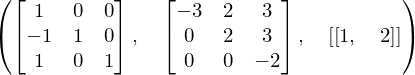

In [184]:
M.LUdecomposition()


Returns (L, U, perm) where L is a lower triangular matrix with unit diagonal, U is an upper triangular matrix, and perm is a list of row swap index pairs. If A is the original matrix, then A = (L*U).permuteBkwd(perm), and the row permutation matrix P such that P*A = L*U can be computed by P=eye(A.row).permuteFwd(perm).

$$P*A = L*U$$

See documentation for LUCombined for details about the keyword argument rankcheck, iszerofunc, and simpfunc.

http://docs.sympy.org/latest/modules/matrices/matrices.html

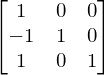

In [185]:
L,U,perm = M.LUdecomposition()
L

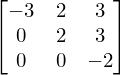

In [186]:
U

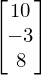

In [187]:
# If LHS A is multiplied by perm, RHS v should be done once.
v = v.permuteBkwd(perm)
v

the elements of x can be computed recursively using forward-substitution

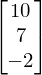

In [188]:
L.LUsolve(v)

Continue with a backward substitution. U is an upper triangular matrix, then the elements of x can be computed recursively using backward-substitution.

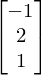

In [189]:
U.LUsolve(L.LUsolve(v))

## More Sympy

ref:

http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb